<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/RegularizacaoL1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularização L1 e L2

A **regularização** é uma técnica para **reduzir overfitting** em modelos de aprendizado de máquina, adicionando um termo de penalização à função de custo.
O objetivo é **controlar a complexidade do modelo**, evitando que ele se ajuste demais aos dados de treino.

---

## 1. Motivação

Quando um modelo é muito complexo (com muitos parâmetros), ele pode se ajustar perfeitamente aos dados de treino, mas ter um desempenho ruim em dados novos (**overfitting**).
A regularização força os **coeficientes** a ficarem menores, favorecendo modelos mais simples e mais generalizáveis.

---

## 2. Função de custo com regularização

A forma geral da função de custo regularizada é:

$$
J(\beta) = \text{Erro}(y, \hat{y}) + \lambda \cdot \Omega(\beta)
$$

* **Erro**: pode ser erro quadrático (regressão) ou log-verossimilhança negativa (classificação).
* **$\lambda$**: parâmetro de regularização, controla a força da penalização.
* **$\Omega(\beta)$**: termo de regularização, que pode ser **L1** ou **L2**.

---

## 3. Regularização L2 (Ridge)

A **regularização L2**, também chamada de **Ridge Regression**, penaliza o **quadrado** dos coeficientes:

$$
\Omega_{L2}(\beta) = \sum_{j=1}^n \beta_j^2
$$

Função de custo (exemplo em regressão logística):

$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right] + \lambda \sum_{j=1}^n \beta_j^2
$$

**Efeito:**

* Tende a encolher todos os coeficientes proporcionalmente.
* **Não** zera coeficientes.
* Bom para quando todas as variáveis são potencialmente relevantes.

---

## 4. Regularização L1 (Lasso)

A **regularização L1**, também chamada de **Lasso Regression**, penaliza o **valor absoluto** dos coeficientes:

$$
\Omega_{L1}(\beta) = \sum_{j=1}^n |\beta_j|
$$

Função de custo (exemplo):

$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right] + \lambda \sum_{j=1}^n |\beta_j|
$$

**Efeito:**

* Pode zerar alguns coeficientes, fazendo **seleção de variáveis** automaticamente.
* Produz modelos mais esparsos.
* Útil quando apenas algumas variáveis são realmente relevantes.

---

## 5. Comparação L1 vs L2

| Característica       | L1 (Lasso)                      | L2 (Ridge)                            |   |             |
| -------------------- | ------------------------------- | ------------------------------------- | - | ----------- |
| Penalização          | (                               | \beta\_j                              | ) | $\beta_j^2$ |
| Zera coeficientes    | Sim                             | Não                                   |   |             |
| Seleção de variáveis | Sim                             | Não                                   |   |             |
| Robustez a outliers  | Maior                           | Menor                                 |   |             |
| Melhor quando        | Poucas variáveis são relevantes | Muitas variáveis pequenas influenciam |   |             |

---

## 6. Elastic Net

O **Elastic Net** combina L1 e L2:

$$
\Omega_{EN}(\beta) = \alpha \sum_{j=1}^n |\beta_j| + (1-\alpha) \sum_{j=1}^n \beta_j^2
$$

* Controla o equilíbrio entre L1 e L2 via o parâmetro $\alpha$.

---

## 7. Exemplo prático em Python

```python
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Criar dados
X, y = make_classification(n_samples=500, n_features=10, n_informative=3,
                           n_redundant=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)

# L2 (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(X_train, y_train)

print("Acurácia L1:", accuracy_score(y_test, model_l1.predict(X_test)))
print("Coeficientes L1:", model_l1.coef_)

print("Acurácia L2:", accuracy_score(y_test, model_l2.predict(X_test)))
print("Coeficientes L2:", model_l2.coef_)
```

---

## 8. Resumo visual dos efeitos

* **L1**: contrai e **zera** alguns coeficientes → modelo mais simples.
* **L2**: contrai todos os coeficientes, mas **mantém todos diferentes de zero**.
* **Elastic Net**: mistura os dois mundos.



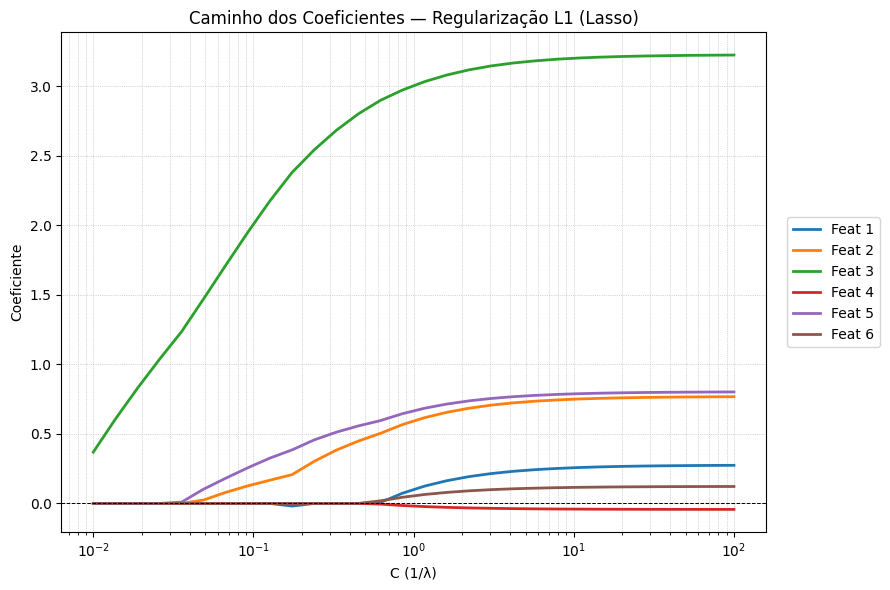

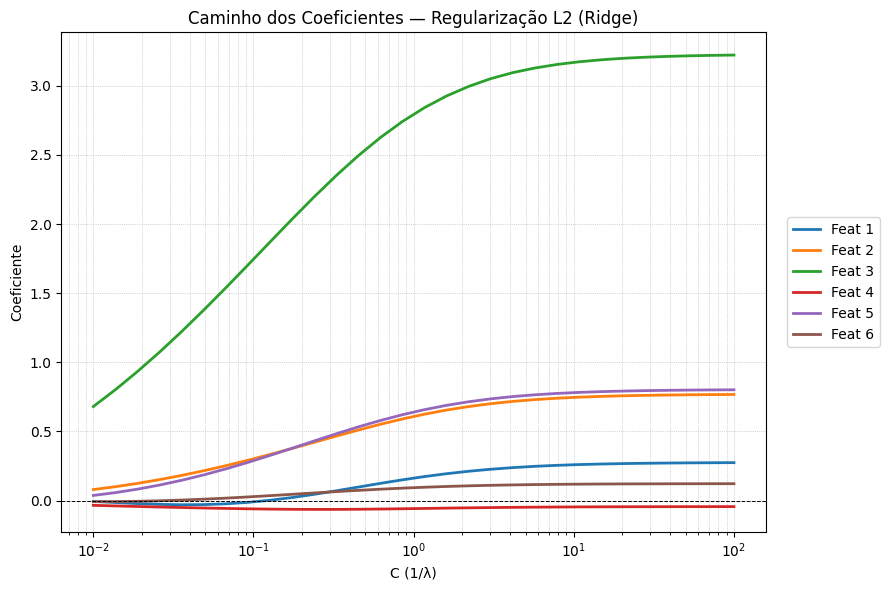

Observação: valores menores de C correspondem a regularização mais forte (λ maior).
Em L1 você deve ver coeficientes indo exatamente para zero quando regularização é forte.


In [2]:
# caminhos_coefs_regularizacao.py
# Gera os gráficos do caminho dos coeficientes para L1 (Lasso) e L2 (Ridge)
# Rode em Jupyter/Colab ou como script (precisa de display gráfico)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# -------------------------
# Configurações
# -------------------------
random_state = 42
n_samples = 300
n_features = 6
Cs = np.logspace(-2, 2, 30)   # valores de C = 1/lambda (de 0.01 a 100)
max_iter = 10000

# -------------------------
# Gerar dataset sintético
# -------------------------
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=4,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=1.0,
                           random_state=random_state)

# -------------------------
# Coletar coeficientes para cada C
# -------------------------
coef_l1 = []
coef_l2 = []

for C in Cs:
    # L1 (usa solver liblinear)
    model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=max_iter)
    model_l1.fit(X, y)
    coef_l1.append(model_l1.coef_.ravel())

    # L2 (também pode usar liblinear; lbfgs funciona para l2 também)
    model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=C, max_iter=max_iter)
    model_l2.fit(X, y)
    coef_l2.append(model_l2.coef_.ravel())

coef_l1 = np.array(coef_l1)   # shape = (len(Cs), n_features)
coef_l2 = np.array(coef_l2)

# nomes das features (para legenda)
feature_names = [f'Feat {i+1}' for i in range(n_features)]

# -------------------------
# Plot: L1
# -------------------------
plt.figure(figsize=(9, 6))
for i in range(coef_l1.shape[1]):
    plt.plot(Cs, coef_l1[:, i], linewidth=2, label=feature_names[i])
plt.xscale('log')
plt.xlabel('C (1/λ)')
plt.ylabel('Coeficiente')
plt.title('Caminho dos Coeficientes — Regularização L1 (Lasso)')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.grid(which='both', linestyle=':', linewidth=0.5)
# legenda fora do gráfico se houver muitas curvas
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

# -------------------------
# Plot: L2
# -------------------------
plt.figure(figsize=(9, 6))
for i in range(coef_l2.shape[1]):
    plt.plot(Cs, coef_l2[:, i], linewidth=2, label=feature_names[i])
plt.xscale('log')
plt.xlabel('C (1/λ)')
plt.ylabel('Coeficiente')
plt.title('Caminho dos Coeficientes — Regularização L2 (Ridge)')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.grid(which='both', linestyle=':', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

# -------------------------
# Observações rápidas
# -------------------------
print("Observação: valores menores de C correspondem a regularização mais forte (λ maior).")
print("Em L1 você deve ver coeficientes indo exatamente para zero quando regularização é forte.")



Esses gráficos mostram como os **coeficientes do modelo** mudam quando variamos a intensidade da regularização, tanto para **L1 (Lasso)** quanto para **L2 (Ridge)**.



## Interpretação do eixo **x** (C)

* O eixo **x** mostra o valor de **C**, que no `scikit-learn` é o **inverso** de $\lambda$ (o parâmetro de regularização):

  $$
  C = \frac{1}{\lambda}
  $$
* **C pequeno** → $\lambda$ grande → regularização **forte**.
* **C grande** → $\lambda$ pequeno → regularização **fraca**.

---

## Gráfico L1 (Lasso)

* Conforme **C diminui** (regularização mais forte), **alguns coeficientes vão exatamente para zero**.
* Isso significa que o modelo está **eliminando variáveis** que considera menos importantes — característica típica da L1.
* O gráfico mostra “trajetórias” onde certas curvas descem até o valor 0 e permanecem lá quando $\lambda$ é suficientemente grande.

**Conclusão:** L1 realiza **seleção de variáveis** automaticamente.

---

## Gráfico L2 (Ridge)

* Conforme **C diminui**, todos os coeficientes **diminuem de magnitude**, mas **nenhum chega exatamente a zero**.
* A redução é mais “suave” — todas as variáveis continuam no modelo, apenas com pesos menores.
* Isso é útil quando **todas** as features têm algum impacto, mesmo que pequeno.

**Conclusão:** L2 faz **encolhimento dos coeficientes** (shrinkage) mas não zera variáveis.

---

## Comparação visual

| Aspecto                           | L1 (Lasso)  | L2 (Ridge) |
| --------------------------------- | ----------- | ---------- |
| Curvas que encostam no zero       | Sim, muitas | Não        |
| Seleção automática de variáveis   | Sim         | Não        |
| Redução uniforme dos coeficientes | Não         | Sim        |



# Exemplo

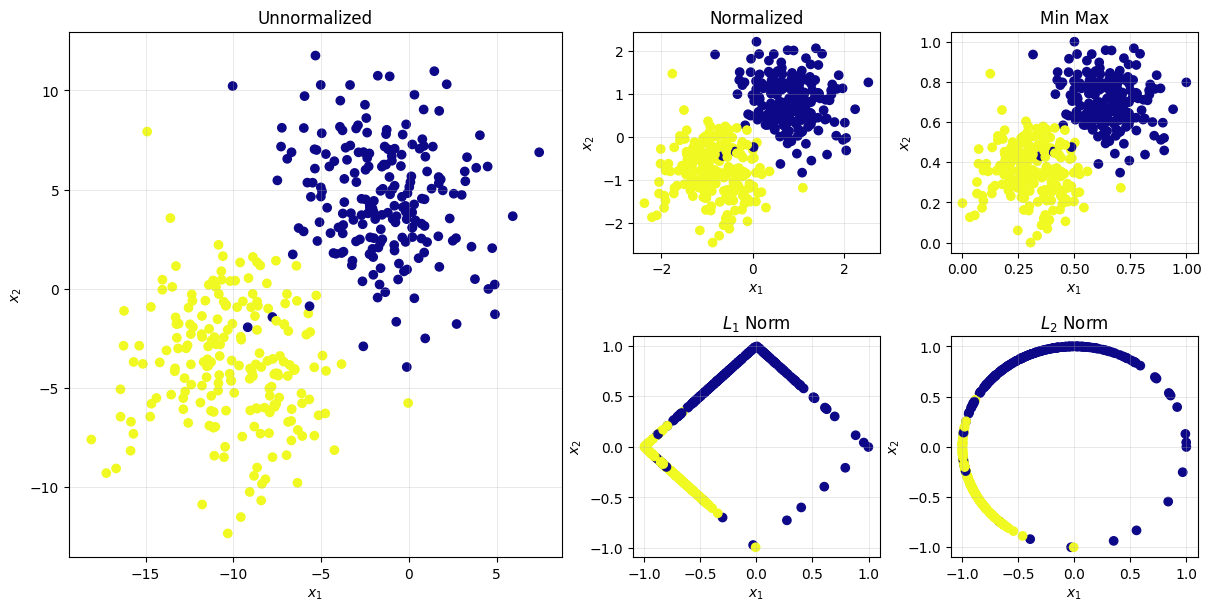

In [3]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

x_train, y_true, true_centroids = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=3, random_state=1, return_centers=True)

x_train_norm = preprocessing.scale(x_train)

minmax = preprocessing.MinMaxScaler()
x_train_minmax = minmax.fit_transform(x_train)

l1norm = preprocessing.Normalizer(norm="l1")
x_train_l1norm = l1norm.fit_transform(x_train)

l2norm = preprocessing.Normalizer(norm="l2")
x_train_l2norm = l2norm.fit_transform(x_train)

binary = preprocessing.Binarizer(threshold=1.4)
x_train_bin = binary.fit_transform(x_train)

onehot = preprocessing.OneHotEncoder()
x_train_bin = onehot.fit_transform(x_train)

fig, ax = plt.subplot_mosaic([["unnorm", "unnorm", 0, 1],
                              ["unnorm", "unnorm", 2, 3]], figsize=(12, 6), layout="constrained")


ax["unnorm"].scatter(*x_train.T, c=y_true, cmap="plasma")
ax[0].scatter(*x_train_norm.T, c=y_true, cmap="plasma")
ax[1].scatter(*x_train_minmax.T, c=y_true, cmap="plasma")
ax[2].scatter(*x_train_l1norm.T, c=y_true, cmap="plasma")
ax[3].scatter(*x_train_l2norm.T, c=y_true, cmap="plasma")


titles = ["Unnormalized", "Normalized", "Min Max", "$L_1$ Norm", "$L_2$ Norm"]
for i, axis in enumerate(ax.values()):
    axis.set_title(titles[i])
    axis.grid(lw=0.4, alpha=0.5)
    axis.set_xlabel("$x_1$")
    axis.set_ylabel("$x_2$")

plt.show()


## Regularização L1 (Lasso)

* **O que faz:** força os pesos a ficarem exatamente zero em muitos casos, ou seja, gera **sparsity** (muitos coeficientes zerados).
* **Quando usar:**

  * Quando você quer **seleção automática de variáveis**, ou seja, eliminar características irrelevantes.
  * Modelos com muitas variáveis e que você suspeita que só algumas são realmente importantes.
  * Para modelos interpretáveis, pois ao zerar coeficientes, o modelo fica mais simples.
* **Exemplo:** problemas de alta dimensionalidade onde poucas features importam.

---

## Regularização L2 (Ridge)

* **O que faz:** penaliza pesos grandes, mas raramente zera pesos; tende a **reduzir** todos os coeficientes proporcionalmente.
* **Quando usar:**

  * Quando quer evitar **overfitting** suavizando o modelo.
  * Quando todas as variáveis são importantes, mas você quer evitar pesos extremos.
  * Funciona melhor quando todas as features contribuem para o modelo, mesmo que de forma pequena.
* **Exemplo:** problemas onde não faz sentido eliminar variáveis, apenas controlar magnitude dos coeficientes.

---

## Resumo rápido

| Característica          | L1                         | L2                  |
| ----------------------- | -------------------------- | ------------------- |
| Tipo de penalização     | Soma dos valores absolutos | Soma dos quadrados  |
| Gera coeficientes zero? | Sim                        | Não                 |
| Útil para seleção       | Sim                        | Não                 |
| Suaviza coeficientes    | Parcialmente               | Sim (uniformemente) |
| Interpretabilidade      | Maior (modelo esparso)     | Menor               |

